<a href="https://colab.research.google.com/github/ruairiodonohoe/dog_classifier/blob/main/dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
ims = search_images_ddg('czechoslovakian wolfdog')
len(ims)

200

In [4]:
dest = "images/czech.jpg"
download_url(ims[0] ,dest)

Path('images/czech.jpg')

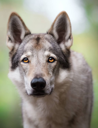

In [5]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [6]:
dog_types = 'czechoslovakian wolfdog','husky','northern inuit'
path = Path('dogs')

In [7]:
if not path.exists():
    path.mkdir()
    for o in dog_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} dog')
        download_images(dest, urls=results)

In [8]:
fns = get_image_files(path)
fns

(#550) [Path('dogs/czechoslovakian wolfdog/fbba3a9e-f750-4f1f-8998-6ec021f37235.jpg'),Path('dogs/czechoslovakian wolfdog/6ba598bc-e26c-4544-bec1-ffd103fc2dfd.jpg'),Path('dogs/czechoslovakian wolfdog/1267e45b-4e42-4f95-835f-8b06fa7645a0.jpg'),Path('dogs/czechoslovakian wolfdog/922903d6-0040-41ee-a1de-a81578e74253.jpg'),Path('dogs/czechoslovakian wolfdog/37759d77-8c1c-49fb-996f-40622ffc0ecc.jpg'),Path('dogs/czechoslovakian wolfdog/e79c69b0-dcbb-4300-a855-b973b238989e.jpg'),Path('dogs/czechoslovakian wolfdog/b2d8c10a-dce8-44c6-b76d-7fd5ef39db5d.jpeg'),Path('dogs/czechoslovakian wolfdog/110cbb19-3564-4c11-9129-2d351322b606.jpg'),Path('dogs/czechoslovakian wolfdog/067d4b71-5c5c-4586-a91b-4c40c606a804.png'),Path('dogs/czechoslovakian wolfdog/e5bea949-435b-4131-a0d5-3c3243c1446f.jpg'),Path('dogs/czechoslovakian wolfdog/4bca4cd7-1d88-4cc7-9cc4-e4937b515730.jpg'),Path('dogs/czechoslovakian wolfdog/2bf2b007-e2c3-4623-8928-dd3cc505d9ab.jpg'),Path('dogs/czechoslovakian wolfdog/6daa261e-144c-4986-a

In [9]:
failed = verify_images(fns)
failed

(#8) [Path('dogs/czechoslovakian wolfdog/d61615ee-c1e9-43a9-93e5-84f651e69b16.jpg'),Path('dogs/czechoslovakian wolfdog/958acd1b-be3c-447f-8a81-f843ddb0649b.jpg'),Path('dogs/husky/4e8833de-05fe-41a8-a06c-ab50a3a9ff01.jpg'),Path('dogs/husky/c56e7cde-871e-4cac-82e6-e7ae000ff124.jpg'),Path('dogs/husky/04373b42-4f88-4b43-b0c6-0c13401cc1cc.jpg'),Path('dogs/northern inuit/79f05670-dfc3-4726-bf8d-d95a1b522eb8.jpg'),Path('dogs/northern inuit/a10e2b38-6e85-43de-9666-36111cc7cdc6.jpg'),Path('dogs/northern inuit/898c1f26-1a18-4ad3-bea2-0cc26a14a6e3.jpg')]

In [10]:
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

In [11]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = dogs.dataloaders(path)

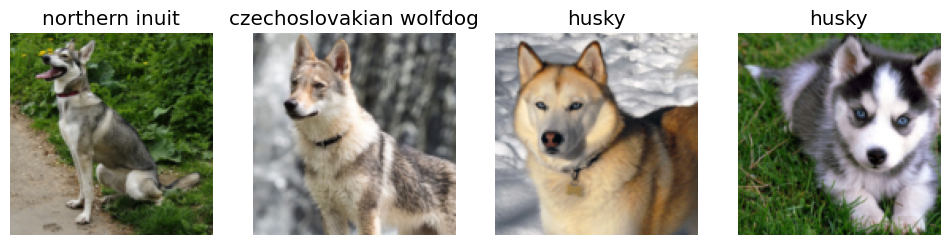

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.448015,0.754480,0.259259,02:00


epoch,train_loss,valid_loss,error_rate,time
0,0.858217,0.706805,0.240741,02:18
1,0.721228,0.612181,0.212963,02:17
2,0.620265,0.589877,0.185185,02:31
3,0.562842,0.574175,0.185185,02:22


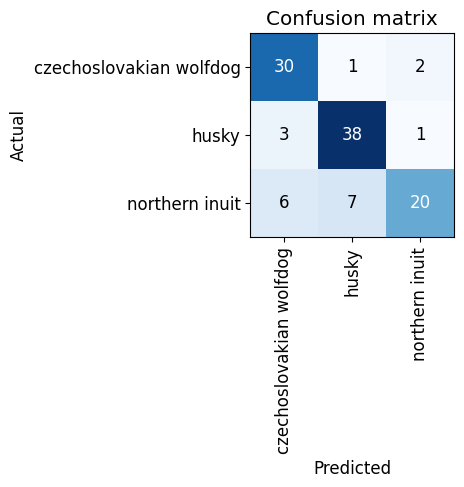

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

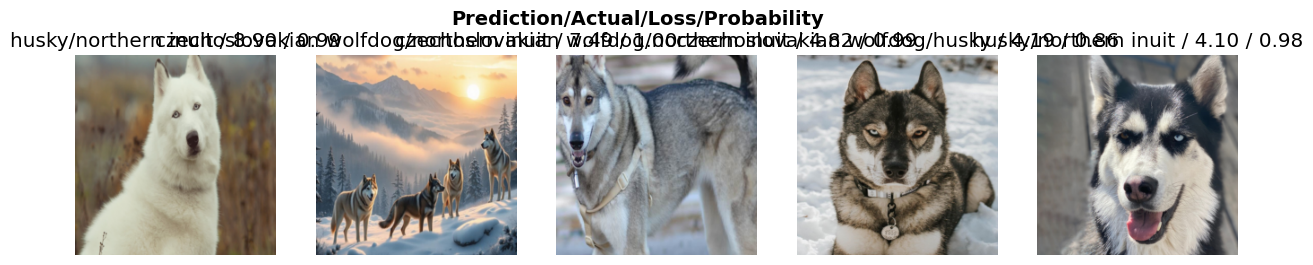

In [17]:
interp.plot_top_losses(5, nrows=1)

In [18]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [19]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [20]:
learn.export()

In [23]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [24]:
learn_inf = load_learner(path/'export.pkl')

In [25]:
learn_inf.predict('images/koa.jpg')

('czechoslovakian wolfdog', tensor(0), tensor([0.8138, 0.0078, 0.1784]))

In [26]:
learn_inf.dls.vocab

['czechoslovakian wolfdog', 'husky', 'northern inuit']

In [27]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
btn_upload = SimpleNamespace(data = ['images/koa.jpg'])

In [29]:
img = PILImage.create(btn_upload.data[-1])

In [30]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [31]:
pred,pred_idx,probs = learn_inf.predict(img)

In [32]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: czechoslovakian wolfdog; Probability: 0.8138')

In [33]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()

In [37]:
#hide_output
VBox([widgets.Label('Select your dog!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [38]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK
